# 설정
     .join() 함수를 쓰는 이유
     - 파일 경로상의 디렉터리를 구분할때 Windows는 역슬레시(\), Unix, Linux는 슬래시(/)로 구분함.
     이처럼 운영체제의 환경에 따라 구분자가 달라지기 때문에 .join() 함수를 사용해 자동으로 환경에 맞춰 구분자를 생성함.


[os관련 정보](https://dololak.tistory.com/693)
[plot관련 정보](https://kongdols-room.tistory.com/98)

In [ ]:
# 글꼴 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import os

# 출력값 조정위한 유사난수 초기화
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt

# 기본값 설정
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False  # 그래프에서 마이너스 기호 표시되도록

# 그림 저장할 폴드
PROJECT_ROOT_DIR = "."  # no.1
CHAPTER_ID = "re_chap_02"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)  # no.2
os.makedirs(IMAGES_PATH, exist_ok=True)  # no.5

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout() # no.3
    plt.savefig(path, format=fig_extension, dpi=resolution)


### 체크체크
        - no.1
        -- 절대 경로와 상대경로
        절대경로는 쉽게 말해 전체 경로를 말하는거 같음
        상대경로는 현재 위치를 기준으로한 위치
        상대경로에서 1. '/' 가장 최상의 디렉토리로 이동 2. './' 현재 디렉토리 의미 3. '../' 상위 디렉토리를 의미
        상위상위 디렉토리로 가려면 당연히 ../../ 라고 쓰면됨
        그래서 no.1에서 "."을 쓴게 현재 디렉토리를 표시하기 위한걸로 보임

        - no.2
        -- .join() 함수
        파일 경로상의 디렉터리를 구분할때 Windows는 역슬레시(\), Unix, Linux는 슬래시(/)로 구분함.
        이처럼 운영체제의 환경에 따라 구분자가 달라지기 때문에 .join() 함수를 사용해 자동으로 환경에 맞춰 구분자를 생성함.
        따라서 no.2를 해석해보면 현재디렉토리 -> images -> CHAPTER_ID (content/images/re_chapter_02)

        - no.3
        -- .tight_layout() 함수
        subplot에서 자동으로 레이아웃을 맞춰줌.
        기본값: tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
        - pad 
        figure과 서브플롯의 모서리 사이 여백 설정
        - h_pad, w_pad
        서로 인접한 서브플롯 사이의 모서리간의 높이 및 넓이 여백 설정
        - rect
        서브플롯을 넣기 위한 사각형 설정. (왼, 바닥쪽, 오, 위쪽)을 입력받음.
        기본값은 (1,0,1,1)

        - no.5
        -- makedirs
        mkdir은 한 폴더만 생성가능하지만 .makedirs는 './a/b/c'처럼 원하는 만큼 디렉터리 생성 가능
        exist_ok=True로 하면 해당 디렉터리가 기존에 존재해도 오류없이 그냥 넘어감




In [ ]:
# 디렉토리 경로와 파일명 분리
file_path = "/content/images/re_chapter_02/hey.png"
print(os.path.split(file_path))  # 튜플로 반환

# 상대결로를 절대경로로 바꿀때
print(os.path.abspath('.'))

# 경로에서 파일명 or 디렉터리 경로 구할때  <- 위의 디렉터리 경로와 파일명 분리하는 것과 기능이 유사한듯
dir_path = os.path.dirname(file_path)   # 파일명 앞까지의 디렉터리 경로
file_name = os.path.basename(file_path) # 경로를 표현하는 문자열에서 파일명 구할때

print(dir_path)
print(file_name)

# 경로 문자열이 파일을 표현하는지 디렉터리를 표현하는지 구하기
print(os.path.isfile(file_path))
print(os.path.isdir("/content"))
print(os.path.isdir(dir_path))

# 위에 두개는 왜 False로 뜨는지 잘 모르겠음.
# 시험용으로 만들어서 그런가?
# ㄴㄴ 있다는 가정하에 봐서 그럼 없으면 False뜸





# 데이터 다운로드

In [ ]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):   # no.4
    if not os.path.isdir(housing_path):  # 폴더 없으면 만들기
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

### 체크체크
    - no.4
    -- tarfile 모듈
    여러 파일을 합치거나 해체할때 사용하는 모듈
    위에서는 tgz 파일 압축 푸는데 사용함. housing_tgz 객체 만들어서 사용함.
    -- urllib.request.urlretrieve 함수
    url로 표시된 네트워크 객체를 로컬 파일로 복사
    기본 값: urllib.request.urlretrieved(url, 로컬에 저장될 파일 이름)
    튜플 형태의 (filename, header)를 반환






In [394]:
fetch_housing_data()

In [395]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")  # csv 파일에 대해선 경로 저장 안했기 때문에 새로 만듬
    return pd.read_csv(csv_path)

In [396]:
housing = load_housing_data()  # 데이터프레임 housing에 할당
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


ocean_proximity(이하 op라 칭함)를 제외하고는 전부 수치형 데이터.
head의 op 이름이 모두 같은 걸로 보아 범주형 데이터로 추측됨.


In [397]:
housing.info() # total_bedrooms에서 결측치 관측됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [398]:
housing["total_bedrooms"].isnull().sum()  # 결측치 207개

207

In [399]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [400]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


그림 저장: attribute_histogram_plots


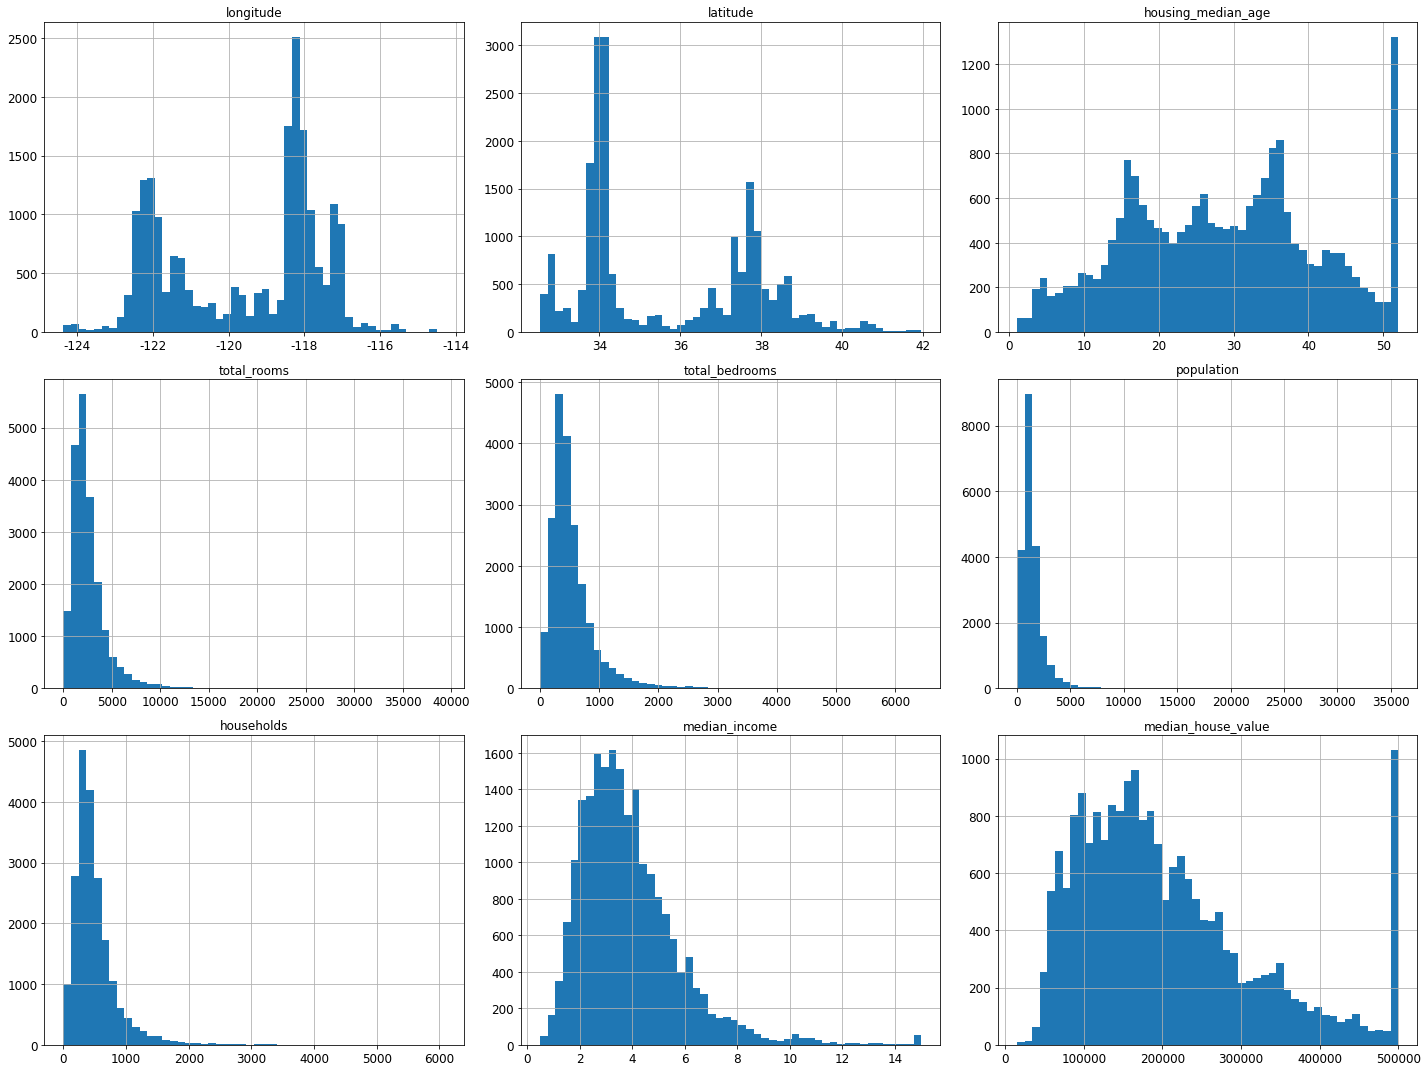

In [401]:
# 다이어그램으로 전체 특성 파악
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

housing_median_age와 median_house_value는 끝값이 엄청 많은걸로 봐선 최대치가 제한되어 있는것으로 보임

In [402]:
np.random.seed(42)

In [403]:
# 사이킷런의 train_test_split() 함수가 있지만 직접 만듬
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]  # no.6

### 체크체크
    - no.6
    
    -- Dataframe에서의 인덱싱

    [] : 위치 정수를 활용한 인덱싱
    .loc[label] : 레이블 기반 인덱싱(정수값이 아닌 레이블!)
    .iloc[position] : 위치 정수를 기반으로 인덱싱
    [:] : 슬라이싱을 활용한 인덱싱
    [bool_vec] : 불리언 벡터를 활용한 인덱싱


[인덱싱 상세한 정보](https://kongdols-room.tistory.com/112)

In [404]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [405]:
from zlib import crc32  # 고유 주소 가져와줌

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32  # no.7

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))  # 각각에 함수 적용해서 불리언 벡터를 반환
    return data.loc[~in_test_set], data.loc[in_test_set]

### 체크체크
    - no.7
    -- 함수 분석
    crc32()는 np.in64()형 정수를 받아 0,2**32-1 범위의 랜덤한 정수인 해시를 만들어냄
    0xffffffff는 32비트에서 표현가능한 최대값
    2**32는 16진수에서 위에 값보다 하나 더 큰 값(0x1 0000 0000)
    위 값에 test_ratio를 곱해서 특정 비율 만큼의 정수를 얻는 것.

[자세한건](https://blog.naver.com/cnuchips/221292744766)

In [406]:
housing_with_id = housing.reset_index() # 'index' 열이 추가된 데이터프레임 반환 # set_index()와 비교해볼것(반대 역할이라 하긴함)
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [407]:
# id로 고유값인 위도와 경도를 사용할수도 있음
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [408]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [409]:
# sklearn 활용한 데이터셋 split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [410]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


계층적 샘플링이 필요함<br/>
train_test_split 함수의 stratify 변수를 활용하면 가능

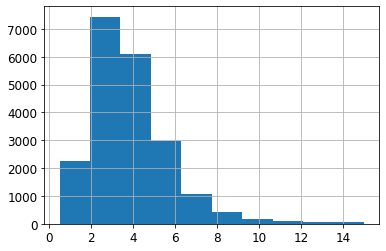

In [411]:
housing["median_income"].hist()
plt.show()

In [412]:
# 소득 카테고리 개수를 제한하기 위해 1.5.로 나눔  # max가 15라 1.5로 나누면 0~10 사이값이 됨
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)  # np.ceil <- 올림함수

# 5 이상은 5로 레이블
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)  # no.8

### 체크체크
    - no.8
    -- .where() 함수
    특정 조건에 맞는 데이터들을 선택하여 출력하는데 사용
    조건식을 입력받아, 조건식에 True에 해당하는 데이터들을 출력
    적용하는 Series나 DataFrame의 형상과 일치하는 데이터를 출력
    inplace=True면 where메서드 적용 시 출력 값으로 원본 배열 교체

[자세한 건](https://kongdols-room.tistory.com/119)

In [413]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

그림 저장: income_category_hist


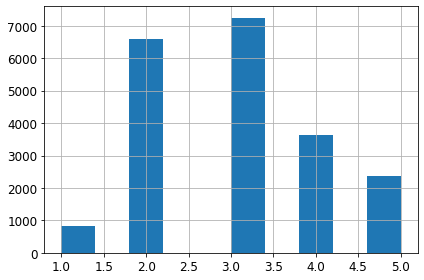

In [414]:
housing["income_cat"].hist()
save_fig('income_category_hist')

In [415]:
# 소득 카테고리 기반으로 계층 샘플링
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]): # 인덱스 반환 # get_n_split함수도 있음
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [416]:
# iloc를 활용해도 똑같음
sss = housing.iloc[train_index]
sss.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0


In [417]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0


In [418]:
# 테스트 세트에서 소득 카테고리의 비율 확인
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [419]:
# 전체 데이터셋의 소득 카테고리 비율 확인
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

train_test_split에서 stratify 변수 사용한것도 함께 비교해봤음

In [420]:
# 비교 그래프
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

train_set2, test_set2 = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
    "Stratified by tts": income_cat_proportions(test_set2),
}).sort_index()  # 인덱스 기준 정렬. 기본값은 오름차순. sort_values() 함수도 있음

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props["StratbyTts. %error"] = 100 * compare_props["Stratified by tts"] / compare_props["Overall"] - 100

In [421]:
display(compare_props)

,Overall,Stratified,Random,Stratified by tts,Rand. %error,Strat. %error,StratbyTts. %error
1.0,0.039826,0.039729,0.040213,0.039729,0.973236,-0.243309,-0.243309
2.0,0.318847,0.318798,0.324370,0.318798,1.732260,-0.015195,-0.015195
3.0,0.350581,0.350533,0.358527,0.350533,2.266446,-0.013820,-0.013820
4.0,0.176308,0.176357,0.167393,0.176357,-5.056334,0.027480,0.027480
5.0,0.114438,0.114583,0.109496,0.114583,-4.318374,0.127011,0.127011


In [422]:
# 데이터 복구
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### inplace 옵션
판다스에서 inplace는 기본값이 False임.<br/>
True이면 변환한 값으로 dataframe을 아예 바꿈(깊은 복사 느낌)<br/>
False 값 사용하는게 실수 줄이는데는 좋음

# 데이터 이해를 위한 탐색과 시각화

In [423]:
# 훈련셋 카피해서 탐색
housing = strat_train_set.copy()

그림 저장: bad_visualization_plot


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text

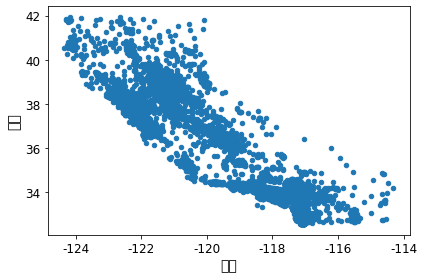

In [424]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude")
ax.set(xlabel='경도', ylabel='위도')  # set()으로 x,y축 최대,최소값과 이름 지정가능
save_fig("bad_visualization_plot")
plt.show()

그림 저장: better_visualization_plot


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text

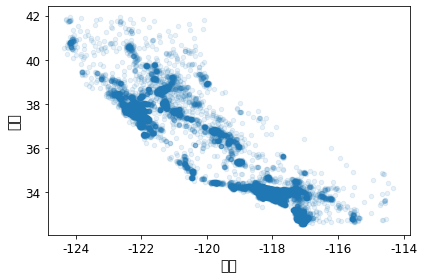

In [425]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
ax.set(xlabel="경도", ylabel="위도")
save_fig("better_visualization_plot")
plt.show()

그림 저장: housing_prices_scatterplot


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_

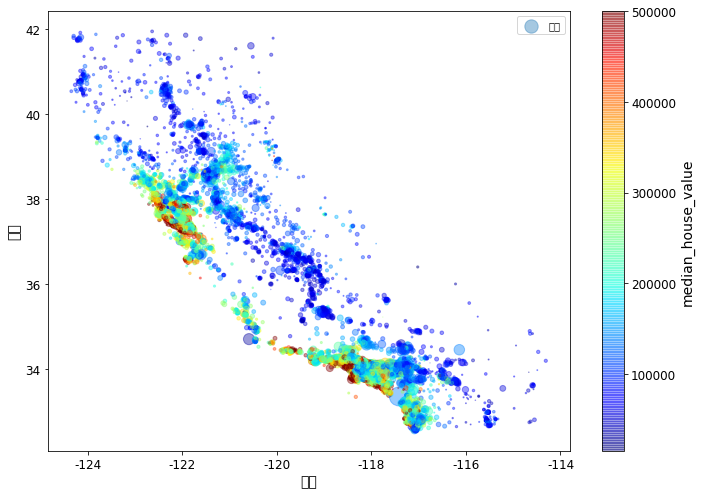

In [426]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                  s=housing["population"]/100, label="인구", figsize=(10,7),
                  c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
                  sharex=False)
ax.set(xlabel='경도', ylabel='위도')
plt.legend()
save_fig("housing_prices_scatterplot")
plt.show()

In [427]:
# 캘리포니아 사진 다운
images_path = os.path.join('.','images', 're_chap_02')
os.makedirs(images_path, exist_ok=True)
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/re_chap_02/california.png',
 <http.client.HTTPMessage at 0x7fc0eb3d9a50>)

그림 저장: california_housing_prices_plot


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_

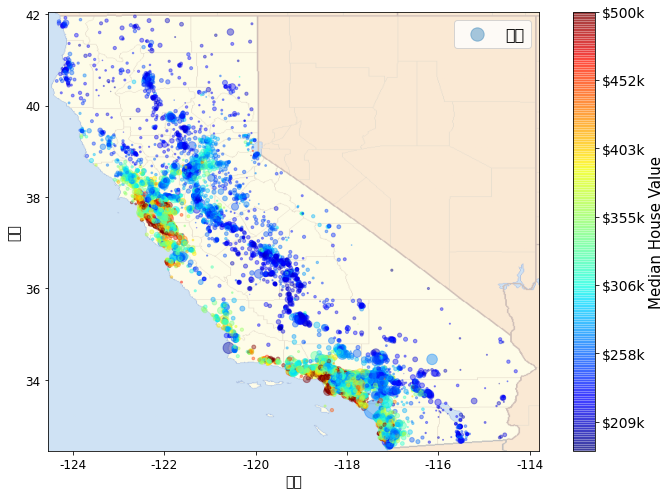

In [428]:
# 지도위에서의 그림
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename)) 
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="인구",
                  c="median_house_value", cmap=plt.get_cmap('jet'),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,  # extent=[horizontal_min,horizontal_max,vertical_min,vertical_max]
           cmap=plt.get_cmap('jet'))
plt.xlabel("경도", fontsize=14)
plt.ylabel("위도", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)  # 11이 없으면 기본값 따라 50개로 나눔
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels([f"${round(v/1000)}k" for v in tick_values], fontsize=14)  # 눈끔 위치 설정
cbar.set_label('Median House Value', fontsize=15)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [429]:
corr_matrix = housing.corr()

In [430]:
corr_matrix["median_house_value"].sort_values(ascending=False) # ascending=False로 내림차순 정렬 설정

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

중간 주택 가격과 상관관계가 높은 특성 조사

그림 저장: scatter_matrix_plot


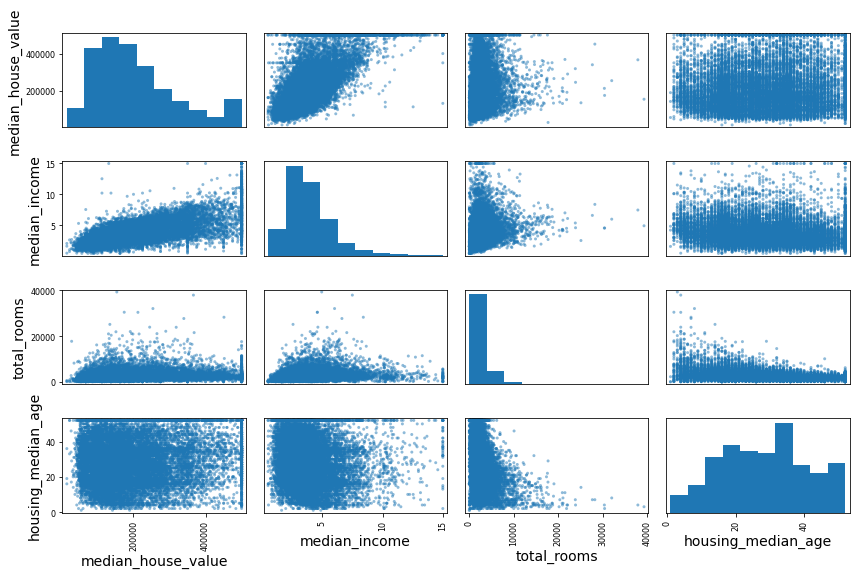

In [431]:
from pandas.plotting import scatter_matrix  # 산점도 행렬 # 대각선 그래프는 바꿀수도 있음

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8)) # 리스트로 받나??
save_fig("scatter_matrix_plot")
plt.show()

그림 저장: income_vs_house_value_scatterplot


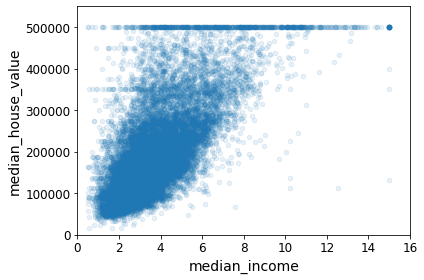

In [432]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

위 그래프에서 직선에 가까운 구역을 제거하라는데 어떻게 제거해야하는지?

In [433]:
# 특성 조합
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] # 가구당 방 개수
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] # 방당 침실
housing["population_per_household"] = housing["population"]/housing["households"] # 가구당 인원

In [434]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

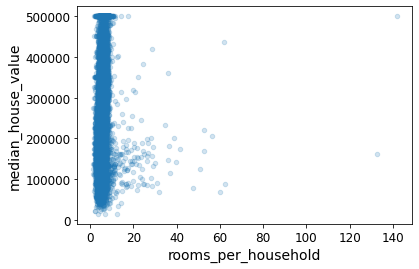

In [435]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.show()

위 그래프는 상관계수가 1인가?

In [436]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 머신러닝 알고리즘을 위한 데이터 준비

In [437]:
housing = strat_train_set.drop("median_house_value", axis=1) # target 레이블 삭제
housing_labels = strat_train_set["median_house_value"].copy()

In [438]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head() # no.9
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


### 체크체크
    - no.9
    -- .any(axis=0) 함수
    지정된 축 방향에서 하나라도 True가 존재하면 True를 출력
    모든 값이 False이면 False를 출력함.

    -- .all(axis=0) 함수
    지정 축의 모든 값이 True면 True 출력
    하나라도 False면 False 출력

[불리언 리덕션 관련](https://kongdols-room.tistory.com/128)


In [439]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])  # 옵션 1 해당구역을 제거

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [440]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)     # 옵션 2 전체 특성을 삭제

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [441]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)  # 옵션 3 특정 값으로 채움 # inplace가 True라서 원본배열이 수정됨

In [442]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [443]:
from sklearn.impute import SimpleImputer # no.10
imputer = SimpleImputer(strategy="median")

### 체크체크
    - no.10
    -- SimpleImputer
    누락된 값을 다루는데 사용
        - strategy 변수
        'mean' : 평균값 (디폴드값)
        'median': 중앙값
        'most_frequent': 최빈값
        'constant': 특정값 ex) SimpleImputer(strategy='constant', fill_value=1)

중간값은 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성을 삭제합니다.

In [444]:
housing_num = housing.drop("ocean_proximity", axis=1)
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

In [445]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [446]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

각 특성의 중값 값이 수동으로 계산한 것과 같은지 확인

In [447]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

훈련 세트 변환

In [448]:
X = imputer.transform(housing_num)  # 넘파이배열 반환

In [449]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [450]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [451]:
imputer.strategy

'median'

In [452]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


범주형 특성인 ocean_proximity 전처리


In [453]:
housing_cat = housing[["ocean_proximity"]] # 리스트로 전달해야 데이터프레임 형태띰 
housing_cat.head(10)                       

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [454]:
# 변수만 전달하면 한줄이라 Series 형태
type(housing["ocean_proximity"])

pandas.core.series.Series

In [455]:
from sklearn.preprocessing import OrdinalEncoder  # 턱스트 -> 숫자로 변환

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [456]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

숫자사이 metric 무시하기 위해 원핫 인코딩을 해준다

In [457]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

OneHotEncoder는 기본적으로 희소 행렬을 반환. 필요하다면 toarray() 메서드를 사용해 밀집 배열로 변환할 수 있다

In [458]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

또는 OneHotEncoder를 만들 때 sparse=False로 지정 가능

In [459]:
cat_encoder = OneHotEncoder(sparse=False)  # 밀집 행렬로
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [460]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

추가 특성을 위해 사용자 정의 변환기 만들기

In [461]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):    # *args or **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않음
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,    # np.11
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())  # 넘파이 배열로 줘야됨

### 체크체크
    - no.11
    -- np.c_ 함수
    두 일차원 배열을 칼럼으로세로로 붙여서 2차원 배열로 만들어줌
    np.r_ 함수도 있음. 자세한건 밑에 사진 참고


![넘파이 배열 함수](https://t1.daumcdn.net/cfile/tistory/9909EF345D53F4D916)

책에서는 간단하게 인덱스 (3, 4, 5, 6)을 하드코딩했지만 다음처럼 동적으로 처리하는 것이 더 좋음

In [462]:
col_names = "total_rooms", "total_bedrooms", "population", "households"    # 아마 튜플로 만들어질걸
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]     # 열 인덱스 구하기   # get_loc은 해당값의 위치를 반환함

또한 housing_extra_attribs는 넘파이 배열이라 열 이름이 없음.(사이킷런을 사용할 때 생기는 문제)<br/>
DataFrame으로 복원하려면 다음과 같이 할 수 있음

In [463]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) + ["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


수치형 특성 전치리 위한 파이프라인

In [464]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),   # 덕 타이핑을 활용한 특성조합 생성 class
                         ('std_scaler', StandardScaler()),
                        ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [465]:
print(housing_num_tr)   # 넘파이 배열 반환
print(housing_num_tr.shape)   # (16512, 11)

[[-1.15604281  0.77194962  0.74333089 ... -0.31205452 -0.08649871
   0.15531753]
 [-1.17602483  0.6596948  -1.1653172  ...  0.21768338 -0.03353391
  -0.83628902]
 [ 1.18684903 -1.34218285  0.18664186 ... -0.46531516 -0.09240499
   0.4222004 ]
 ...
 [ 1.58648943 -0.72478134 -1.56295222 ...  0.3469342  -0.03055414
  -0.52177644]
 [ 0.78221312 -0.85106801  0.18664186 ...  0.02499488  0.06150916
  -0.30340741]
 [-1.43579109  0.99645926  1.85670895 ... -0.22852947 -0.09586294
   0.10180567]]
(16512, 11)


In [466]:
from sklearn.compose import ColumnTransformer   # 각 열마다 적절한 변환을 적용하기위한 모듈

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
                                   ('num', num_pipeline, num_attribs),
                                   ('cat', OneHotEncoder(), cat_attribs),
                                ])

housing_prepared = full_pipeline.fit_transform(housing)   # 기존 column 순서와 달라질수 있어서 맞춰주는 작업이 필요함

In [467]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [468]:
housing_prepared.shape

(16512, 16)

(판다스 DataFrame열의 일부를 선택하기 위해) DataFrameSelector 변환기와 FeatureUnion을 사용한 예전방식도 있는데 안적을거

# 모델 선택과 훈련

In [469]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
print(type(housing_prepared), type(housing_labels))  # 넘파이 배열과 판다스 시리즈

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [470]:
# 훈련 샘플 몇 개를 사용해 전체 파이프라인을 적용
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))

예측: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


실측값과 비교

In [471]:
print("레이블:", list(some_labels))

레이블: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [472]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [473]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

사이킷런 0.22 버전부터는 squared=False 매개변수로 mean_squared_error() 함수를 호출하면 RMSE를 바로 얻을 수 있음

In [474]:
import sklearn
sklearn.__version__

lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse

68628.19819848923

In [475]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

In [476]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)   # 트리모델은 전처리 필요없긴함 but 범주형은 숫자로 바꿔줘야되긴함
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [477]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_rmse

0.0

오차값이 0으로 나온걸로 보아 과대적합으로 추정됨<br/>

# 모델 세부 튜닝

[교차 검증 자세히](https://davinci-ai.tistory.com/18)

In [478]:
# 결정트리 교차검증
from sklearn.model_selection import cross_validate

scores = cross_validate(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
tree_rmse_scores = np.sqrt(-scores['test_score'])

In [479]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
평균: 71407.68766037929
표준 편차: 2439.4345041191004


In [480]:
# 선형회귀 교차검증
lin_scores = cross_validate(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
lin_rmse_scores = np.sqrt(-lin_scores['test_score'])
display_scores(lin_rmse_scores)

점수: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균: 69052.46136345083
표준 편차: 2731.674001798348


In [481]:
# 랜덤 포레스트(앙상블)  # cross_validate 사용하면 train 점수 구하는데 밑에처럼 할 필요없음
import time
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators 기본값 100이라 안적어도 되긴함

start = time.time()
forest_reg.fit(housing_prepared, housing_labels)
ck1 = time.time() - start

n_jobs=-1 변경한 시간 체크

In [482]:
forest_reg_n = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

start = time.time()
forest_reg_n.fit(housing_prepared, housing_labels)
ck2 = time.time() - start

In [483]:
print("n_job=-1 테스트")
print(f"적용x:{ck1:.2f}s 적용o:{ck2:.2f}s")

n_job=-1 테스트
적용x:15.61s 적용o:11.86s


n_jobs=-1 적용했을때 빨라짐<br/>
코랩은 코어수가 2개. 캐글은 코어가 4개기도하고 여타 성능들이 좋아서 요새는 캐글 많이 사용한다고 함

In [484]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
forest_rmse

18603.515021376355

In [485]:
# 랜덤 포레스트 교차검증
forest_scores = cross_validate(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
forest_rmse_scores = np.sqrt(-forest_scores['test_score'])
display_scores(forest_rmse_scores)

점수: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
평균: 50182.303100336096
표준 편차: 2097.0810550985693


판다스 시리즈로 간단하게 계산

In [486]:
scores = cross_validate(lin_reg, housing_prepared, housing_labels, 
                        scoring="neg_mean_squared_error", cv=10, n_jobs=-1, return_train_score=True)

print(np.sqrt(-scores['train_score']).mean())
pd.Series(np.sqrt(-scores['test_score'])).describe()

68605.80994524364


count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

위에서 test점수가 더 높게 나오는걸로봐서 과소적합된걸로 보임

In [487]:
# 서포트 벡터 머신
from sklearn.svm import SVR

# kernel=linear
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
svm_rmse

111094.6308539982

In [ ]:
# 가우시안 커널
svm_reg = SVR(kernel="rbf")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
svm_rmse

In [ ]:
# kernel=poly
svm_reg = SVR(kernel="poly")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
svm_rmse

In [490]:
# kernel=sigmoid
svm_reg = SVR(kernel="sigmoid")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
svm_rmse

118309.04170410427

[서포트 벡터머신 커널 관련](https://datascienceschool.net/03%20machine%20learning/13.03%20%EC%BB%A4%EB%84%90%20%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0.html)

모델 저장

In [ ]:
import joblib

my_model = svm_reg
joblib.dump(my_model, "my_model.pkl")
# 이후에 불러올때
my_model_loaded = joblib.load("my_model.pkl")

In [ ]:
# 그리드 탐색
from sklearn.model_selection import GridSearchCV

param_grid = [
              # 12(=3x4)개의 하이퍼파라미터 조합을 시도
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              # bootstrap은 False로 하고 6(=2x3)개의 조합을 시도
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
            ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번 훈련함
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=-1)

grid_search.fit(housing_prepared, housing_labels)

최상의 파라미터 조합은 아래와 같음

In [ ]:
grid_search.best_params_

In [494]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

그리드서치에서 테스트한 하이퍼파라미터 조합의 점수 확인

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

### 랜덤 탐색
혼공머에서 했던거 참고함 and LGBM 활용


In [497]:
from scipy.stats import uniform, randint  # 실수값, 정수값
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor

params = {'n_estimators': randint(20, 40,),
          'max_features': randint(3, 10),
          'min_impurity_decrease': uniform(0.0001, 0.001)
          }

lgb = LGBMRegressor(random_state=42)

random_search = RandomizedSearchCV(lgb, params, cv=5,
                           scoring='neg_mean_squared_error',
                           n_iter=10, random_state=42, n_jobs=-1)
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=42,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent=...
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc0f34ad150>,
        

In [498]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

51021.41779395557 {'max_features': 9, 'min_impurity_decrease': 0.0008965429868602329, 'n_estimators': 34}
53523.97000629203 {'max_features': 5, 'min_impurity_decrease': 0.0008796910002727694, 'n_estimators': 26}
52065.56960403186 {'max_features': 4, 'min_impurity_decrease': 0.0002559945203362027, 'n_estimators': 30}
55171.57538283772 {'max_features': 5, 'min_impurity_decrease': 0.0009661761457749352, 'n_estimators': 23}
56264.42537993986 {'max_features': 5, 'min_impurity_decrease': 0.00012058449429580245, 'n_estimators': 21}
56264.42537993986 {'max_features': 6, 'min_impurity_decrease': 0.00103855270901575, 'n_estimators': 21}
51792.320897633355 {'max_features': 6, 'min_impurity_decrease': 0.00028340450985343384, 'n_estimators': 31}
51792.320897633355 {'max_features': 4, 'min_impurity_decrease': 0.000624756431632238, 'n_estimators': 31}
52441.276231942546 {'max_features': 3, 'min_impurity_decrease': 0.0003912291401980419, 'n_estimators': 29}
51021.41779395557 {'max_features': 6, 'min_i

In [499]:
random_search.best_params_

{'max_features': 9,
 'min_impurity_decrease': 0.0008965429868602329,
 'n_estimators': 34}

In [500]:
lgb = random_search.best_estimator_
lgb.score(housing_prepared, housing_labels)

0.8298906838907179

In [501]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [502]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]   # ColumnTransformer에 사용한 변환기는 named_trandformers_속성에서 참조가능
cat_one_hot_attribs = list(cat_encoder.categories_[0])   # 원핫인코딩한 특성이름
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

In [503]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

In [504]:
print(final_rmse)
print(final_model.score(housing_prepared, housing_labels))
print(final_model.score(X_test_prepared, y_test))

47730.22690385927
0.9726660983699668
0.8251813171106783


테스트 RMSE에 대한 95% 신뢰 구간 계산

In [505]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))  # sem <- 표준오차 계산

array([45685.10470776, 49691.25001878])

수동으로 계산하는법



In [506]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45685.10470776, 49691.25001877858)

t-점수 대신 z-점수 사용

In [507]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45685.717918136455, 49690.68623889413)

# 연습문제 4번

In [513]:
all_pipeline = Pipeline([
                         ('pre', full_pipeline),
                         ('pred', final_model)
])

all_pipeline.fit(housing, housing_labels)
all_pipeline.score(X_test,y_test)

0.8251813171106783